<center>
    <img src="https://github.com/TUIlmenauAMS/MRSP_Tutorials/blob/master/images/msp_header.png?raw=1">
</center>

#### Prof. Dr. -Ing. Gerald Schuller <br> Jupyter Notebook: Renato Profeta

# Sampling

In [1]:
%%html
<center>
<iframe width="560" height="315" src="https://www.youtube.com/embed/PEaW9xG5cJM" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>
</center>

## Sampling a Discrete Time Signal

In [2]:
%%html
<center>
<iframe width="560" height="315" src="https://www.youtube.com/embed/uZFKOUfibt4" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>
</center>

So what happens if we further downsample an already discrete signal x(n), to reduce its sampling rate?

**Downsampling by N** means we only keep every Nth sample and discard every sample in between. Observe that this results in a **normalized frequency which is a factor of N higher**.

**Observe:** This downsamplig factor N is also called **"stride"** in **Machine Learning** Neural Network literature and software.

This downsampling process can also be seen as first multiplying the signal with a sequence of **unit pulses** (a 1 at each sample position), zeros in between, and later dropping the zeros. This multiplication with the unit pulse train can now be used to mathematically analyse this downsampling, looking at the resulting spectra, first still including the zeros. The frequency response now becomes


$$\large X^d(\Omega)=\sum_{n=mN} x(n)e^{-j \Omega n}$$
$$\large =\sum_{m=- \infty}^ \infty x(mN)e^{-j \Omega mN}$$
for all integers m.

Again we can write down-sampling as a multiplication of the signal with a sampling function. In continuous time it was the sequence of Dirac impulses, here it is a **sequence of unit pulses** at positions of multiples of N,

$$ \Delta_N ( n ) = \left ( \matrix {{1 , if n = m N} \\ {0 , e l s e}} \right) $$

Then the sampled signal, with the zeros still in it, becomes

$$x^d(n)=x(n)\Delta _N (n)$$

**Oberseve** that this is similar to **modulation** but instead of a sinusoidal signal we use the sampling signal. For modulation we saw that it shifts the signal spectrum to the frequency of the sinusoidal signal.

Here the **signal is shifted** to the **frequency components of the sampling signal.** it can be shown that the frequency componentes of the sampling signal consist of a **DC** component, the fundamental frequency of **$\frac{2\cdot\pi}{N}$**, and **harmonics** at integer multiples of its fundamental frequency, and all these components have the **same strenght.**

This $x^d(n)$ signal is now an intermediate signal, which gets the zeros removed before transmission or storage in an **encoder**, to reduce the needed data rate. The **decoder** upsamples it by re-inserting the zeros to obtain the original sampling rate.

**Observe** that this is then also the signal  that we obtain after this upsampling in the decoder. Hence this signal looks interesting to us, because it appears in the encoder and also in the decoder.


What does its **spectrum or frequency response** look like?

The derivation can be found in lecture ADSP, slides 06, sampling.

In [3]:
%%html
<center>
<iframe src="https://nbviewer.jupyter.org/github/GuitarsAI/ADSP_Tutorials/blob/master/ADSP_06_Sampling.ipynb" width="900" height="200"></iframe>
</center>

It shows that sampling, still including the zeros, leads (in the frequency domain) to **multiple shifted versions** of the signal spectrum, the so-called **aliasing components**, at the above mentioned frequency components of the sampling
signal,

$$\large
\begin{equation}
X^d (\Omega)= \frac{1} {N} \sum _{k=0} ^{N-1} X \left(- \frac{2 \pi}{N} \cdot k + \Omega \right)
\end{equation}
$$


<center>
    <img src='https://github.com/TUIlmenauAMS/MRSP_Tutorials/blob/master/images/aliasing_components.png?raw=1'>
</center>

**Observe:** The spectral components **don't overlap if** their **bandwidths** are below $\dfrac {2\pi}{N}$ for **complex** signals, or for a **real valued** low pass signal, it should be **below** $ \dfrac{\pi}{N}$!

If we want to reconstruct the original signal, hence we need to make sure the aliasing components **don't overlap** by suitable **filtering at the high sampling rate**, to prepare for the down-sampling. Observe that the term „Aliasing“ in the literature is sometime only used for overlapping alias components, and sometimes more broadly, like we do here, to mean any additional shifted frequency component.

Next is an **example**, also including the negative frequencies that now show up above normalized frequency 1 (**1** being the Nyquist frequency here), and showing 2 sine signals at different strength at normalized frequencies 0.4 and 0.35. This can also be seen as a narrow band signal, resulting e.g. from a passband filter.

In [4]:
%%html
<center>
<iframe width="560" height="315" src="https://www.youtube.com/embed/sB5HRZgqgIg" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>
</center>

In [5]:
## Imports
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Signal Processing Parameters
Fs = 32000
T=1/Fs
t = np.arange(Fs//32)*T

# Signals
w35 = 0.35*Fs/2
sine_35 = np.sin(2*np.pi*w35*t)
w40 = 0.4*Fs/2
sine_40 = 100*np.sin(2*np.pi*w40*t)
signal=sine_35+sine_40

# FFT
from numpy.fft import fft
signal_fft = fft(signal)
freqs = np.fft.fftshift(np.fft.fftfreq(signal.size,d=T))+Fs/2

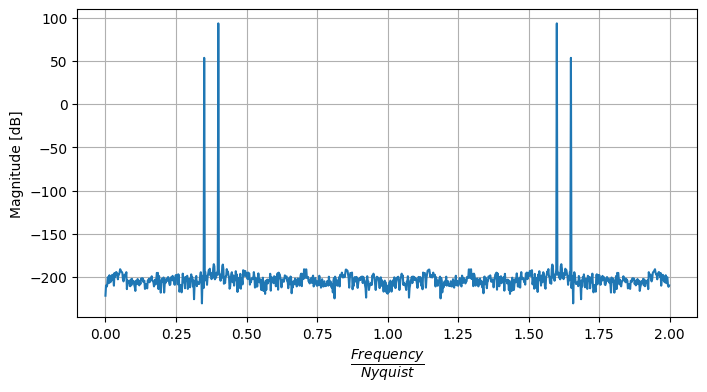

In [7]:
plt.figure(figsize=(8,4))
plt.plot(freqs/(Fs/2),20*np.log10(np.abs(signal_fft)))
plt.grid()
plt.ylabel('Magnitude [dB]')
plt.xlabel(r'$\dfrac{Frequency}{Nyquist}$');

After sampling by a factor of N=4, still including the zeros, we get the following spectrum.

In [8]:
unit = np.zeros(Fs//32)
unit[::4]=1
print(sum(unit)/len(unit))
signal_downsampled = signal*unit

0.25


The multiplication of the signals in the time-domain is the convolution of their spectra in the frequency domain. Above is the spectrum of the sinusoids. Now we compute the spectrum of the sampling signal "unit".
Then we multiply the 2 signals for the downsampling.

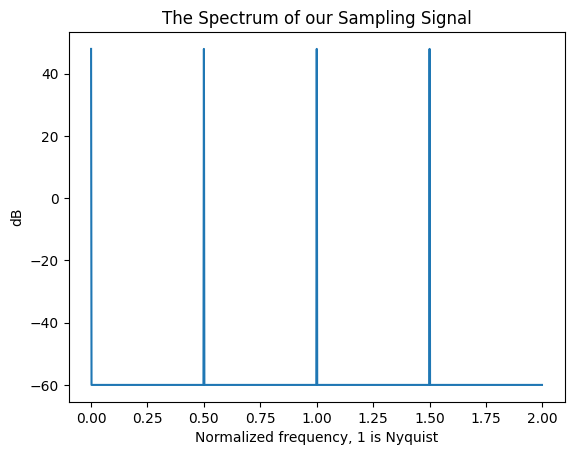

In [9]:
signal_ds_fft = fft(signal_downsampled)
unit_fft=fft(unit)

plt.plot(freqs/(Fs/2),20*np.log10(abs(unit_fft)+1e-3))
plt.title('The Spectrum of our Sampling Signal')
plt.ylabel('dB')
plt.xlabel('Normalized frequency, 1 is Nyquist')
plt.show()

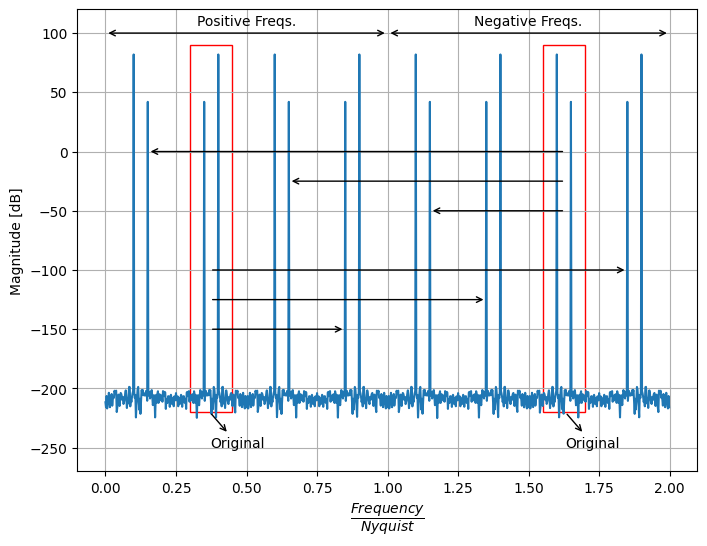

In [10]:
from matplotlib.patches import Rectangle

plt.figure(figsize=(8,6))
plt.plot(freqs/(Fs/2),20*np.log10(np.abs(signal_ds_fft)))
plt.grid()
plt.ylabel('Magnitude [dB]')
plt.xlabel(r'$\dfrac{Frequency}{Nyquist}$')
plt.ylim((-270,120))

# Annotations
plt.annotate(text='', xy=(0,100), xytext=(1,100), arrowprops=dict(arrowstyle='<->'))
plt.text(0.5, 110, 'Positive Freqs.', horizontalalignment='center', verticalalignment='center')

plt.annotate(text='', xy=(1,100), xytext=(2,100), arrowprops=dict(arrowstyle='<->'))
plt.text(1.5, 110, 'Negative Freqs.', horizontalalignment='center', verticalalignment='center')

ax = plt.gca()
rect = Rectangle((0.3,-220),0.15,310,linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)
rect = Rectangle((1.55,-220),0.15,310,linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)

plt.annotate(text='', xy=(0.37,-150), xytext=(0.85,-150), arrowprops=dict(arrowstyle='<-'))
plt.annotate(text='', xy=(0.37,-125), xytext=(1.35,-125), arrowprops=dict(arrowstyle='<-'))
plt.annotate(text='', xy=(0.37,-100), xytext=(1.85,-100), arrowprops=dict(arrowstyle='<-'))

plt.annotate(text='', xy=(1.63,-50), xytext=(1.15,-50), arrowprops=dict(arrowstyle='<-'))
plt.annotate(text='', xy=(1.63,-25), xytext=(0.65,-25), arrowprops=dict(arrowstyle='<-'))
plt.annotate(text='', xy=(1.63,0), xytext=(0.15,0), arrowprops=dict(arrowstyle='<-'))

plt.annotate(text='Original', xy=(0.37,-220), xytext=(0.37,-250), arrowprops=dict(arrowstyle='<-'))
plt.annotate(text='Original', xy=(1.63,-220), xytext=(1.63,-250), arrowprops=dict(arrowstyle='<-'));

The picture shows that the spectrum still contains the **original spectrum, plus** the spectral **copies** at frequency shifts of $k\cdot \dfrac{ 2 \cdot \pi}{N}$ from the originals.

**Observe:** Since we have a real valued signal (the sinusoids), the spectrum of negative and positive frequencies are **symmetric** around frequency zero. This then leads to the **mirrored appearance** between the neighbouring spectral images or aliasing components.

Nyquist tells us to sample in such a way, that the shifted spectra of our signal do not overlap. Otherwise, if they overlap, we cannot separate those parts of the spectrum anymore, and we loose information, which we cannot reconstruct.

**In conclusion:** Sampling a signal by a factor of N, with keeping the zeros between the sample points, leads to N-1 aliasing components or spectral copies.

**Example:**

Make a sine wave which at 44100 Hz sampling rate has a frequency of 400 Hz at 1 second duration. Hence we need 44100 samples, and 400 periods of our sinusoid in this second. Hence we can write our signal in Python as:

In [11]:
%%html
<center>
<iframe width="560" height="315" src="https://www.youtube.com/embed/GpiB5cDa5to" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>
</center>

In [12]:
import numpy as np
fs = 44100
f = 400.0
s=np.sin(2*np.pi*f*np.arange(0,1,1.0/fs))

In [13]:
import IPython.display as ipd
ipd.Audio(s, rate=fs)

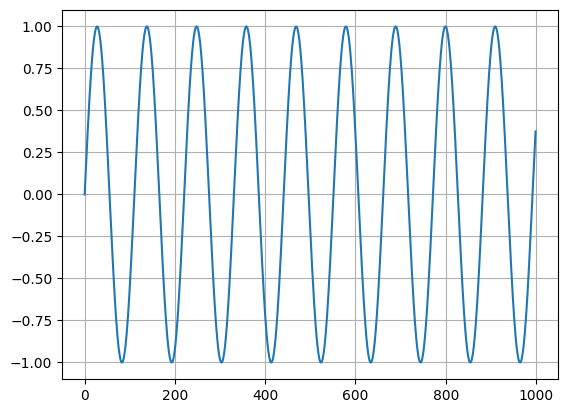

In [14]:
# Plot the first 1000 samples
plt.figure()
plt.plot(s[0:1000])
plt.grid()

Now take a look at the magnitude spectrum (in dB) of the original signal s.
The plot shows the magnitude of the frequency spectrum of our signal. Observe that the frequency axis (horizontal) is a *normalized* frequency, normalized to the Nyquist frequency as $\pi$, in our case 22050 Hz. Hence our sinusoid should appear as a peak at normalized frequency 400.0/22050*pi=0.05699, which we indeed see.

length of signal s in samples: 44100
Freqz applies a window of length worN, whose frequenzy response 'smears' the obtained frequency response correspindingly


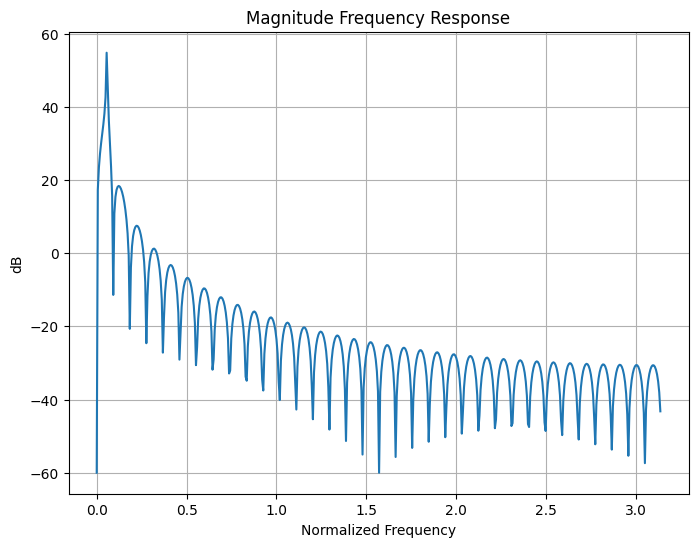

In [15]:
from scipy.signal import freqz
print("length of signal s in samples:", len(s))
print("Freqz applies a window of length worN, whose frequenzy response 'smears' the obtained frequency response correspindingly")
#help(freqz)
w,H=freqz(s, worN=512)
plt.figure(figsize=(8,6))
plt.plot(w, 20*np.log10(abs(H)+1e-3))
plt.xlabel('Normalized Frequency')
plt.ylabel('dB')
plt.title('Magnitude Frequency Response')
plt.grid()

Now we can multiply this sine tone signal with a unit pulse train, with N=8.
We generate the unit impulse train,

<ipython-input-16-4bfee977a316>:4: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(unit[0:100], use_line_collection=True)


Text(0, 0.5, 'unit(n)')

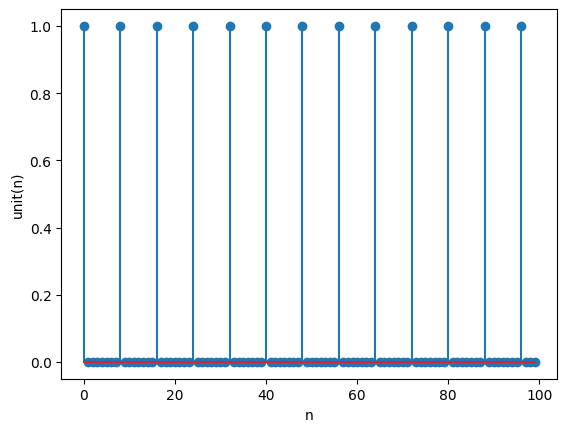

In [16]:
unit = np.zeros(44100)
unit[0::8] = 1
plt.figure()
plt.stem(unit[0:100], use_line_collection=True)
plt.xlabel('n')
plt.ylabel('unit(n)')

In [17]:
ipd.Audio(unit,rate=44100)

 The multiplication with the unit impulse train:

In [18]:
sdu=s*unit

(This multiplication is also called „frequency mixing“).
Now plot the result, the first 100 samples:

<ipython-input-19-397aea1769da>:3: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(sdu[0:100],linefmt='r',markerfmt='r.', use_line_collection=True, label='Downsampled with zeros')


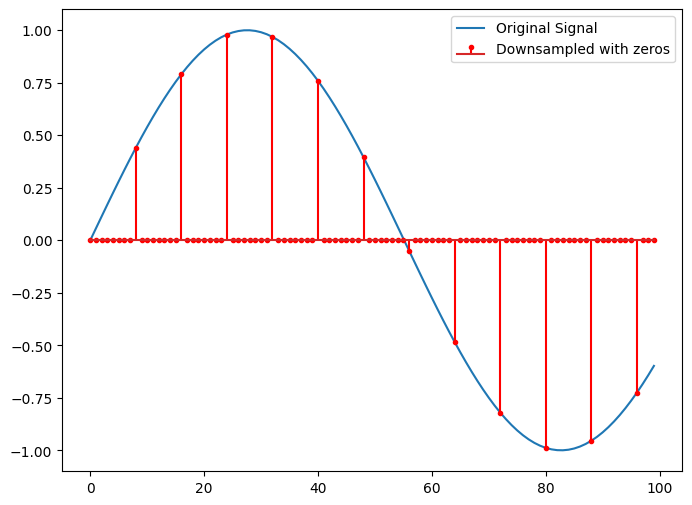

In [19]:
plt.figure(figsize=(8,6))
plt.plot(s[0:100], label='Original Signal')
plt.stem(sdu[0:100],linefmt='r',markerfmt='r.', use_line_collection=True, label='Downsampled with zeros')
plt.legend();

This is our signal still with the zeros in it.


Now we can compare the original frequency response to our signal with the zeros, sdu:

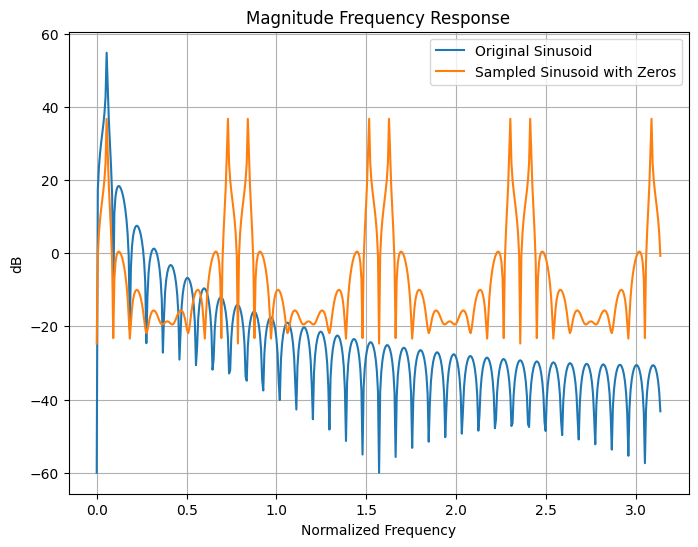

In [20]:
plt.figure(figsize=(8,6))
w,H=freqz(s)
plt.plot(w, 20*np.log10(abs(H)+1e-3))
plt.xlabel('Normalized Frequency')
plt.ylabel('dB')
plt.title('Magnitude Frequency Response')

w,H=freqz(sdu)
plt.plot(w, 20*np.log10(abs(H)+1e-3))
plt.legend(('Original Sinusoid','Sampled Sinusoid with Zeros'))
plt.grid();

Here we can see the original line of our 400 Hz tone, and now also the 7 new aliasing components. Observe that always 2 aliasing components are close together. This is because the original 400 Hz tone also has a spectral peak at the negative frequencies, at -400 Hz, or at normalized frequency -0.05699.

Now also listen to the signal with the zeros:

In [21]:
ipd.Audio(sdu,rate=44100)

here you can hear that it sounds quite different from the original, because of the strong aliasing components!

### Real-Time Python Example

In [22]:
%%html
<center>
<iframe width="560" height="315" src="https://www.youtube.com/embed/hbIQOeD4N2k" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>
</center>

Here you can hear that it sounds quite different from the original, because of the strong aliasing components!

**Python** real time audio **example**: This example takes the microphone input and samples it, without removing the zeros, and plays it back the the speaker in real time.

It constructs a unit pulse train, with a 1 at every N'th sample, using the modulus function „%“,

```s=(np.arange(0,CHUNK)%N)==0```

# Sampling real time example

In [23]:
!pip install ffmpeg-python

In [24]:
#@title Recording audio from microphone {display-mode: "form"}
"""
From:
https://colab.research.google.com/gist/ricardodeazambuja/03ac98c31e87caf284f7b06286ebf7fd/microphone-to-numpy-array-from-your-browser-in-colab.ipynb
Here are some of the possible references:
https://blog.addpipe.com/recording-audio-in-the-browser-using-pure-html5-and-minimal-javascript/
https://stackoverflow.com/a/18650249
https://hacks.mozilla.org/2014/06/easy-audio-capture-with-the-mediarecorder-api/
https://air.ghost.io/recording-to-an-audio-file-using-html5-and-js/
https://stackoverflow.com/a/49019356
"""
from IPython.display import HTML, Audio
from google.colab.output import eval_js
from base64 import b64decode
import numpy as np
from scipy.io.wavfile import read as wav_read
import io
import ffmpeg

AUDIO_HTML = """
<script>
var my_div = document.createElement("DIV");
var my_p = document.createElement("P");
var my_btn = document.createElement("BUTTON");
var t = document.createTextNode("Press to start recording");

my_btn.appendChild(t);
//my_p.appendChild(my_btn);
my_div.appendChild(my_btn);
document.body.appendChild(my_div);

var base64data = 0;
var reader;
var recorder, gumStream;
var recordButton = my_btn;

var handleSuccess = function(stream) {
  gumStream = stream;
  var options = {
    //bitsPerSecond: 8000, //chrome seems to ignore, always 48k
    mimeType : 'audio/webm;codecs=opus'
    //mimeType : 'audio/webm;codecs=pcm'
  };
  //recorder = new MediaRecorder(stream, options);
  recorder = new MediaRecorder(stream);
  recorder.ondataavailable = function(e) {
    var url = URL.createObjectURL(e.data);
    var preview = document.createElement('audio');
    preview.controls = true;
    preview.src = url;
    document.body.appendChild(preview);

    reader = new FileReader();
    reader.readAsDataURL(e.data);
    reader.onloadend = function() {
      base64data = reader.result;
      //console.log("Inside FileReader:" + base64data);
    }
  };
  recorder.start();
  };

recordButton.innerText = "Recording... press to stop";

navigator.mediaDevices.getUserMedia({audio: true}).then(handleSuccess);


function toggleRecording() {
  if (recorder && recorder.state == "recording") {
      recorder.stop();
      gumStream.getAudioTracks()[0].stop();
      recordButton.innerText = "Saving the recording... pls wait!"
  }
}

// https://stackoverflow.com/a/951057
function sleep(ms) {
  return new Promise(resolve => setTimeout(resolve, ms));
}

var data = new Promise(resolve=>{
//recordButton.addEventListener("click", toggleRecording);
recordButton.onclick = ()=>{
toggleRecording()

sleep(2000).then(() => {
  // wait 2000ms for the data to be available...
  // ideally this should use something like await...
  //console.log("Inside data:" + base64data)
  resolve(base64data.toString())

});

}
});

</script>
"""

def get_audio():
  display(HTML(AUDIO_HTML))
  data = eval_js("data")
  binary = b64decode(data.split(',')[1])

  process = (ffmpeg
    .input('pipe:0')
    .output('pipe:1', format='wav')
    .run_async(pipe_stdin=True, pipe_stdout=True, pipe_stderr=True, quiet=True, overwrite_output=True)
  )
  output, err = process.communicate(input=binary)

  riff_chunk_size = len(output) - 8
  # Break up the chunk size into four bytes, held in b.
  q = riff_chunk_size
  b = []
  for i in range(4):
      q, r = divmod(q, 256)
      b.append(r)

  # Replace bytes 4:8 in proc.stdout with the actual size of the RIFF chunk.
  riff = output[:4] + bytes(b) + output[8:]

  sr, audio = wav_read(io.BytesIO(riff))

  return audio, sr

In [28]:
audio, sr = get_audio()
print("sampling rate=", sr)

sampling rate= 48000


##Sampling:

In [29]:
N=8
print(np.arange(0,len(audio))%N)
#s=(np.arange(0,len(audio))%N)==0

if len(audio.shape)>1: #stereo, make mono
   audio=audio[:,0] #keep left channel
s=np.zeros(audio.shape)
s[::N]=1
audio_data_s=audio*s
ipd.Audio(audio_data_s,rate=48000)

[0 1 2 ... 5 6 7]


#As terminal Python program:

Download "pyrecplay_samplingblock.py" from our Github repository and run it in a terminal shell with:

python pyrecplay_samplingblock.py

## Removing the Zeros

In [31]:
%%html
<center>
<iframe width="560" height="315" src="https://www.youtube.com/embed/XGKfAm1-Mek" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>
</center>

The final step of downsampling is now to omit the zeros between the samples, to obtain the lower sampling rate. Let's call the signal without the zeros  $y(m)$ where the time index m denotes the **lower sampling rate** (as opposed to n, which denotes the higher sampling rate).

In our Python example this is:

<ipython-input-32-28aa2fb5934a>:3: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(sd[0:int(100/8)],linefmt='r',markerfmt='r.', use_line_collection=True, label='Downsampled without zeros')


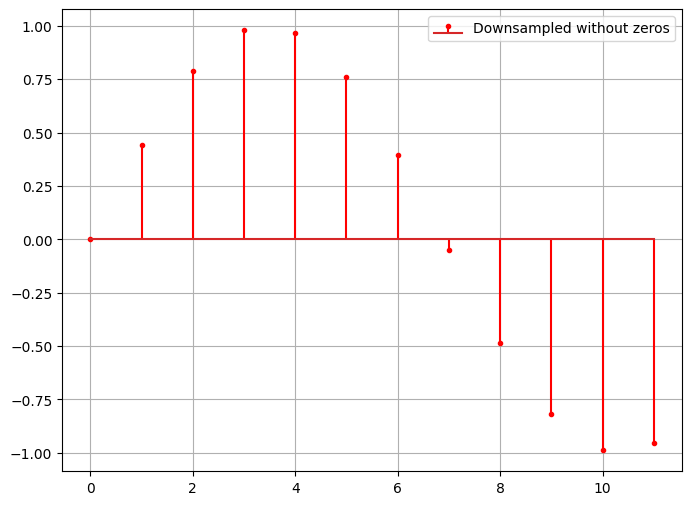

In [32]:
sd = sdu[0:44100:8]
plt.figure(figsize=(8,6))
plt.stem(sd[0:int(100/8)],linefmt='r',markerfmt='r.', use_line_collection=True, label='Downsampled without zeros')
plt.legend()
plt.grid();

We can now take a look at the spectrum with :

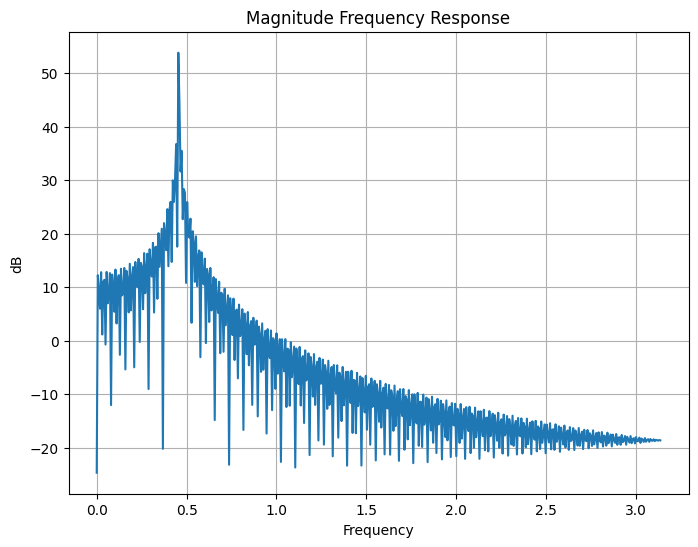

In [33]:
w,H=freqz(sd)
plt.figure(figsize=(8,6))
plt.plot(w, 20*np.log10(abs(H)+1e-3))
plt.xlabel('Frequency')
plt.ylabel('dB')
plt.title('Magnitude Frequency Response')
plt.grid()

Observe that the sine signal now appear at normalized frequency of 0.455, a **factor of 8 higher** than before, with the zeros in it, because we **reduced the sampling rate by 8**.

This is because we now have a new Nyquist frequency of 22050/8 now, hence our normalized frequency becomes $400*3.14 / 22050.8 \approx 0.455$. This means removing the zeros scales or stretches our frequency axis.

    
Observe that in our time-domain plot, we only have $100/8 \approx12$ samples left.

How are the frequency responses or spectra of $y(m)$ and $x^d(n)$ connected?

We can simply take the Fourier transforms of them,

$$ \large
X^d (\Omega)=\sum _ {n=- \infty}^ \infty x^d (n) \cdot  e^{-j \Omega n}
$$

still with the zeros in it. Hence most of the sum contains only zeros. Now we only need to let the sum run over the non-zeros entries (only every Nth entry), by replacing n by mN, and we get

$$ \large
X^d (\Omega)=\sum _ {n=mN} x^d (n) \cdot  e^{-j \Omega n}
$$

for all integer m, now without the zeros. Now we can make the connection to the Fourier transform of y(m), by making the index substitution m for n in the sum,


$$ \large
X^d (\Omega)= \sum _{m=- \infty} ^ \infty y(m) \cdot  e^{-j \Omega \cdot N m} = Y(\Omega \cdot N)
$$

This is now our result. It shows that the downsampled version (with the removal of the zeros), has the same frequency response, but the frequency variable $\Omega$ is scaled by the factor N.

For instance, the normalized frequency $\pi /N$ before downsampling becomes $\pi$ after removing the zeros! It shows that a small part of the spectrum before downsampling becomes the full usable spectrum after downsampling.

Observe that we don't loose any frequencies this way, because by looking at eq. (1) we see that we obtain multiple copies of the spectrum in steps of $2\pi /N$, and hence the spectrum already has a periodicity of $2\pi /N$. This means that the spectrum between $-\pi/N$ and $\pi/N$ for instance (we could take any period of length $2\pi /N$) contains a unique and full part of the spectrum, because the rest is just a periodic continuation.

This can be seen in following pictures,

<center>
    <img src='https://github.com/TUIlmenauAMS/MRSP_Tutorials/blob/master/images/lecture6-6.PNG?raw=1' width="600">
    <cite> Figure: The magnitude spectrum of a signal. The 2 boxes symbolize the passband of an ideal bandpass, here a high pass. </cite>
    <img src='https://github.com/TUIlmenauAMS/MRSP_Tutorials/blob/master/images/lecture6-8.PNG?raw=1' width="600">
    <cite>Figure: The signal spectrum after passing through the high pass. </cite>
    <img src='https://github.com/TUIlmenauAMS/MRSP_Tutorials/blob/master/images/lecture6-7.PNG?raw=1' width="600">
    <cite>Figure: Signal spectrum after multiplication with the unit pulse train, for N=2, hence setting every second value to zero (the zeros still in the sequence). Observe that we shift and add the signal by multiples of $2\pi /2=\pi$, and in effect we obtain „mirrored“ images of the high frequencies to the low frequencies (since we assume a real valued signal). Observe that the mirrored spectra and the original spectrum don't overlap, which makes reconstruction easy.</cite>
    <img src='https://github.com/TUIlmenauAMS/MRSP_Tutorials/blob/master/images/lecture6-9.PNG?raw=1' width="600">
    <cite>Figure: Signal spectrum after downsampling (removing the zeros) by N (2 in this example). Observe the stretching of the spectrum by a factor of 2. </cite>
</center>

## Upsampling

In [34]:
%%html
<center>
<iframe width="560" height="315" src="https://www.youtube.com/embed/Ow_FOJS82gc" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>
</center>

What is still missing in our system is the upsampling, as the opposite operation of downsampling, for the case where we would like to increase our sampling rate. One of the first (**wrong!**) approaches to upsampling that often comes to mind if we want to do upsampling by a factor of N, is to simply repeat every sample N-1 times.

**But** this is equivalent to first inserting N-1 zeros after each sample, and then filter the resulting sequence by a **low pass** filter with an impulse response of N ones. This is a very special case, and we would like to have a more general case.

In our case, we actually a high pass filter, not a low pass. Hence we assume that we upsample by always first inserting N-1 **zeros** after each sample, and then have some interpolation filter for it (can also be a **high or band pass**, as needed to reconstruct a signal).

Again we take the signal at the lower sampling rate as $y(m)$, with index m for the lower sampling rate, and the signal at the higher sampling rate, with the zeros in it, as $x^d(n)$ with index n for the higher sampling rate. Here we can see that this is simply the reverse operation of the final step of removing the zeros for the downsampling.

Hence we can take our result from downsampling and apply it here:

$$X^d(\Omega)=Y(\Omega \cdot N)$$
$$or$$
$$X^d(\Omega /N)=Y(\Omega )$$

We are now just coming from y(m), going to the now upsampled signal $x^d(n)$.

For instance if we had the frequency $\pi$ before upsampling, it becomes $\pi /2$ for the upsampled signal, if we have N=2. In this way we now get an „extended“ frequency range.

Since we now have again the signal including the zeros, $x^d(n)$, we again have the periodic spectrum, as before, as we progress through the same steps backwards now. We can also see that the result of upsampling is periodic in frequency, because the signal was $2\pi$ periodic before upsampling anyway, and after upsampling the  frequency scale replaces $2\pi \cdot N$ by $2\pi$.

## Reconstruction

In [35]:
%%html
<center>
<iframe width="560" height="315" src="https://www.youtube.com/embed/bIYXoAUISNs" frameborder="0" allow="accelerometer; gyroscope; picture-in-picture" allowfullscreen></iframe>
</center>

Observe that if the **aliasing components don't overlap**, we can **perfectly reconstruct** the signal by using a suitable filter. We can make sure that they don't overlap by **filtering** the signal at the **higher sampling rate**, before they can overlap (as we did in our high pass example). If they already overlap at the lower sampling rate, it would be too late to separate the different components, the signal would already be „destroyed“.

We can perfectly reconstruct the high pass signal in our example if we use ideal filters, using upsampling and ideal high pass filtering.

In this way we have for the analysis and synthesis the following picture:

<center>
    <br>
    <img src='https://github.com/TUIlmenauAMS/MRSP_Tutorials/blob/master/images/Lecture6-10.PNG?raw=1'>
</center>

Observe that we violate the conventional Nyquist criterium, because our high pass passes the high frequencies. But then the sampling mirrors those frequencies to the lower range, such that we can apply the traditional Nyquist sampling theorem. This method is also known as bandpass Nyquist. This is an important principle for filter banks and wavelets. It says that we can perfectly reconstruct a bandpass signal in a filter bank, if we sample with twice the rate as the **bandwidth** of our bandpass signal (assuming ideal filters, to avoid spectral overlap of aliasing components).

In genereal this is true for **complex** filters.<br>
For **real** valued filters observe that this simple assumption only works if we have bandpass filters which start at frequencies $\pi/N\cdot k$(integer k) .  Otherwise we could have overlap to the aliased components!

For proof and details see ADSP, lecture 06, Sampling.

**Summary:** if our band boarders are alligned with multiples of $\pi/N$ then we can donwsample by N, otherwise we are on the save side by using N/2 as downsampling rate for real valued signals.  For complex signals we can always downsample by N, regardles of the exact placement of the bandpass filter.

Compare with the standard Nyquist case: here we have a lowpass signal which we downsample and reconstruct:
<center>
    <img src='https://github.com/TUIlmenauAMS/MRSP_Tutorials/blob/master/images/Lecture6-12.PNG?raw=1'>
</center>

# Example of a file-based spectrogram tool:

https://colab.research.google.com/github/TUIlmenauAMS/InteractiveSpectrogramWithZoom/blob/main/spectrogram.ipynb

## Python Example: Live Spectrogram: Sampling, LP Filtering

Dowload the Python file "pyrecspecwaterfallsampling.py" from our Github repository and run it in a terminal shell with:

python pyrecspecwaterfallsampling.py

**Observe:** When we turn on **sampling**, we clearly **hear** the aliasing **artifacts**, and we also see them as spectral copies in the waterfall spectrogram.

When we turn on the **low pass filter**, most of the aliasing artifacts are **not audible** anymore, and we also **don't see** most of them anymore in the waterfall spectrogramm, but it also sounds **more muffled**.

## Python Example:

Just create an audio signal in Python, and filter it with our previous low pass filter (e.g. Kaiser Window with Beta=8)

In [45]:
%%html
<center>
<iframe width="560" height="315" src="https://www.youtube.com/embed/VQ_lVRLtpfY" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>
</center>

In [46]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import librosa as lbr
import scipy.signal as signal

In [47]:
# Signal Processing Parameters
Fs = 32000   # Sampling frequency

In [48]:
# Input Signal
tone=lbr.tone(220, sr=Fs, length=16000)
tone[:1024]*=np.linspace(0,1,1024)
tone[-1024:]*=np.linspace(1,0,1024)
for i in range(20,30,2):
    tone_i = lbr.tone(440*i, sr=Fs, length=16000)
    tone_i[:1024]*=np.linspace(0,1,1024)
    tone_i[-1024:]*=np.linspace(1,0,1024)

    tone+=tone_i


In [49]:
# Listen to Input testing signal
ipd.Audio(tone, rate=Fs)

(Text(0.5, 1.0, 'Magnitude Frequency Response'),)

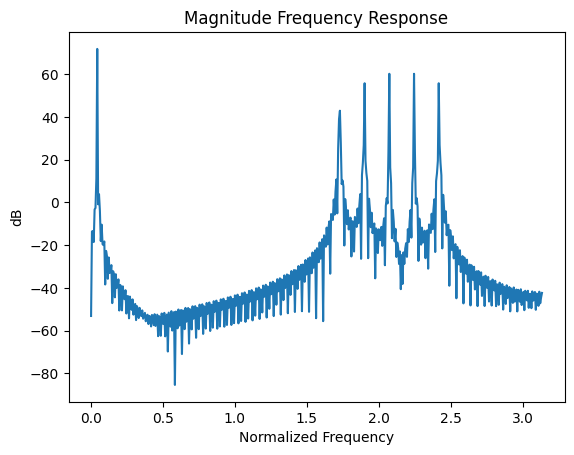

In [50]:
#Look at its spectrum:
w,H=signal.freqz(tone)
plt.figure()
plt.plot(w,20*np.log10(abs(H)))
plt.xlabel('Normalized Frequency')
plt.ylabel('dB')
plt.title('Magnitude Frequency Response'),

Now we can low pass filter it. We take our Kaiser Window low pass filter design from previous lectures.

Text(0.5, 1.0, 'Magnitude Frequency Response of our signal')

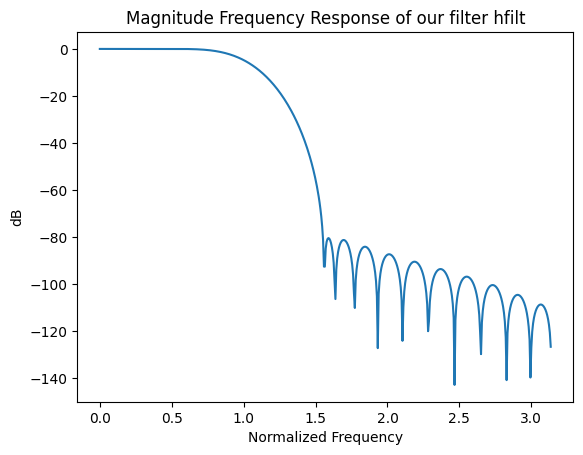

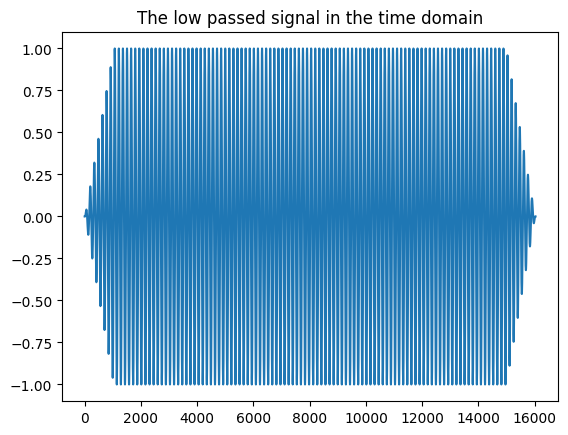

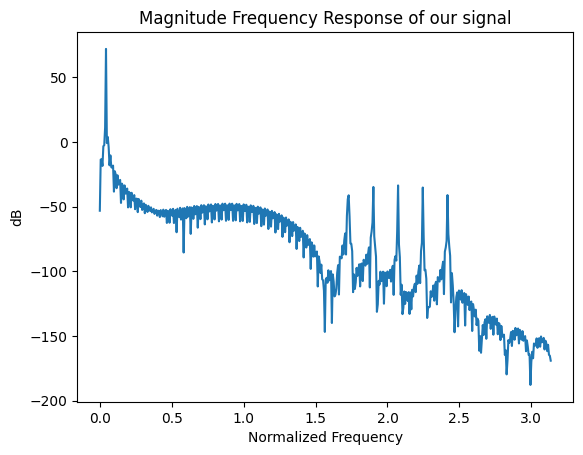

In [51]:
n = np.arange(32)
w_c = 0.33*np.pi
n_d = (len(n)-1)/2.0
#ideal impulse response:
h = np.sin(w_c*(n-n_d))/(np.pi*(n-n_d))
#Kaiser window:
hk = np.kaiser(32,8)
#multiply ideal filter and Kaiser
#window:
hfilt = hk*h
w,H=signal.freqz(hfilt)
plt.figure()
plt.plot(w,20*np.log10(abs(H)))
plt.xlabel('Normalized Frequency')
plt.ylabel('dB')
plt.title('Magnitude Frequency Response of our filter hfilt')

xlp=np.convolve(tone,hfilt)
plt.figure()
plt.plot(xlp)
plt.title('The low passed signal in the time domain')
w,H=signal.freqz(xlp)
plt.figure()
plt.plot(w,20*np.log10(abs(H)))
plt.xlabel('Normalized Frequency')
plt.ylabel('dB')
plt.title('Magnitude Frequency Response of our signal')


Observe that beginning at frequency 1.5 we have indeed much attenuation.
Listen to the low pass version:

In [52]:
# Listen
display(ipd.Audio(xlp, rate = Fs ))

Now we can down-sample it by a factor of N=2, including the removal of the zeros,

Text(0.5, 1.0, 'Magnitude Frequency Response')

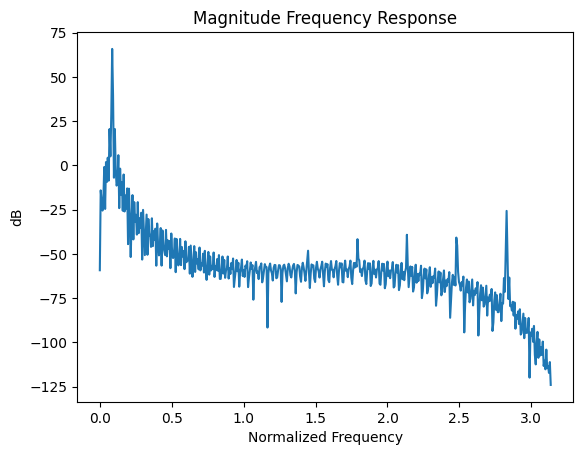

In [53]:
xds = xlp[::2]
w,H=signal.freqz(xds)
plt.figure()
plt.plot(w,20*np.log10(abs(H)))
plt.xlabel('Normalized Frequency')
plt.ylabel('dB')
plt.title('Magnitude Frequency Response')

Observe that we now obtain the “streched” spectrum.
Listen to it:

In [54]:
# Listen
display(ipd.Audio(xds, rate = Fs//2 ))

It should sound more “mufed”, but otherwise the same, but at now half the sampling rate!

Now we can upsample again, using the same indexing trick, now just on the receiving side, efectively inserting a zero after each sample.

Observe that in this way we can avoid the function “downsample” or “upsample”, which makes it clearer to see and check what happens,

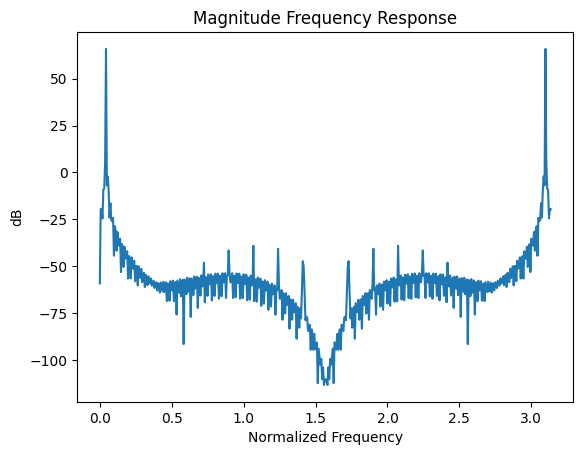

In [55]:
xups = np.zeros(2*max(xds.shape))
xups[::2] = xds
w,H=signal.freqz(xups)
plt.figure()
plt.plot(w,20*np.log10(abs(H)))
plt.xlabel('Normalized Frequency')
plt.ylabel('dB')
plt.title('Magnitude Frequency Response');

Observe the “shrinking” and periodic continuation of the spectrum, the aliasing component at the high frequencies.

Listen to the signal including aliasing,

In [56]:
# Listen
display(ipd.Audio(xups, rate = Fs))
print("Fs=", Fs)

Fs= 32000


Now low pass filter the result,

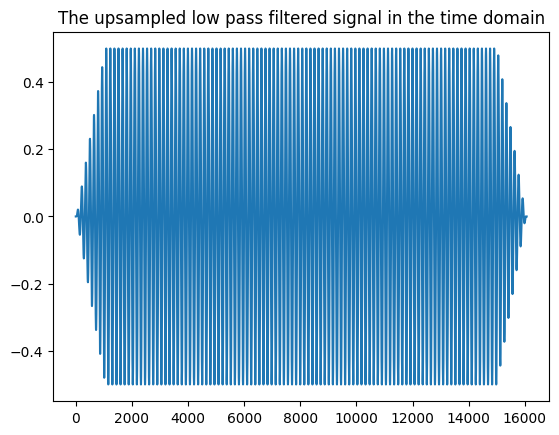

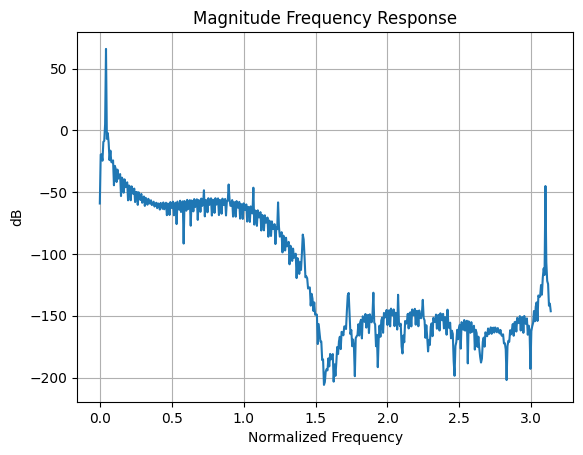

In [57]:
xupslp = np.convolve(xups,hfilt)
plt.figure()
plt.plot(xupslp)
plt.title("The upsampled low pass filtered signal in the time domain")

w,H=signal.freqz(xupslp)
plt.figure()
plt.plot(w,20*np.log10(abs(H)))
plt.xlabel('Normalized Frequency')
plt.ylabel('dB')
plt.title('Magnitude Frequency Response')
plt.grid()

Observe that now we removed the aliasing component at high frequencies. Also observe that in the time domain it can be seen that the amplitude now is only 0.5, from originally 1.0. This is because for **downsampling we lost half the signal samples and hence power**.

Now listen to it,

In [58]:
# Listen
display(ipd.Audio(xupslp, rate = Fs))

Observe: it should now sound the same as at the lower sampling rate, but now at the
higher sampling rate of 32 kHz!

(Possible diferences are due to not sufciently attenuated aliasing).